<a href="https://colab.research.google.com/github/2yeonsong/MachineLearning/blob/main/4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 점진적 학습(훈련한 모델에 새로운 데이터에 대한 훈련을 추가)
# 확률적 경사 하강법(대표적인 점진적 학습 알고리즘,
# 전체 훈련 샘플 중 랜덤하게 하나를 선택하여 조금씩 가장 가파른 경사를 찾아 나가는 방법)

In [2]:
# 확률적 경사 하강법(한 개씩 꺼내기)
# 미니 배치 경사 하강법(여러 개씩 꺼내기)
# 배치 경사 하강법(몽땅 꺼내기)

In [3]:
# 손실 함수(값이 작을 수록 좋음)
# 로지스틱 손실 함수(이진 크로스엔트로피 손실 함수라고도 불림, 이진 분류에서 사용되는 손실 함수)

In [4]:
# 데이터 준비
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [7]:
# 입력 데이터
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

# 타깃 데이터
fish_target = fish['Species'].to_numpy()

In [8]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [10]:
# 표준화 전처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [11]:
from sklearn.linear_model import SGDClassifier

In [17]:
# 훈련, 평가
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [18]:
# 점진적 학습이 가능하므로 추가 훈련 수행
# 1 에포크씩 이어서 훈련

# 모델을 이어서 훈련(partial_fit)
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [19]:
# 최적화
# 에포크 횟수에 따라서 과대/과소적합 문제가 발생 할 수 있다.
# 그렇다면 얼마나 해야할까!!

# 조기 종료 : 과대적합이 시작하기 전에 훈련을 멈추는 것
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [22]:
# 0부터 300까지 에폭시를 증가 시켜보기
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

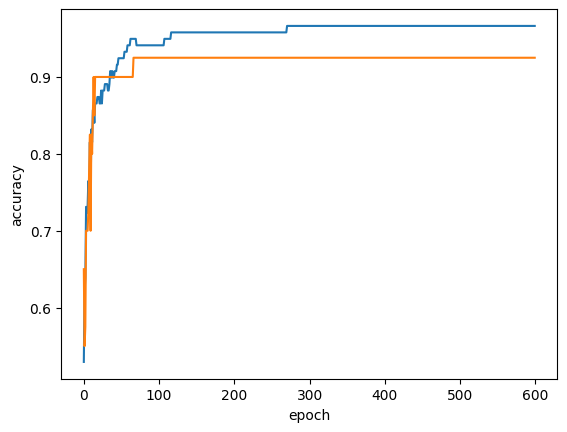

In [23]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
# 에포크가 100이 넘으면서 룬련 세트와 테스트 세트의 점수가 벌어짐
# 에포크가 50 이전에는 과소적합 되고있으므로 100정도가 적합하다고 생각

In [24]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [26]:
# 힌지 손실
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
